In [41]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import datetime

import os
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, GlobalAveragePooling1D, Dropout,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
#Building the neural network
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.layers import Input, LSTM, RepeatVector, Masking, TimeDistributed, Lambda
from tensorflow.keras.models import Model
from collections import Counter




from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


from sklearn.manifold import TSNE
import seaborn as sns



def truncate_sequence(sequence,n):
    return [sequence[i:i + n] for i in range(0, len(sequence), n)]





def preprocess_data_by_class(list_of_input_paths,output_path,atomic_size,N,counting_method='original_sequence'):
    class_i=1
    df=[]
    for input_path in list_of_input_paths:

        if counting_method=='original_sequence':
            with open(output_path, "w") as output_handle:
                output_handle.write('sequence' + "\t" + 'class' +'\n')
                count=1
                for seq_record in SeqIO.parse(input_path, "fasta"):
                    if count<N+1:       
                        sequence = str(seq_record.seq)
                        list_of_atom_seq=truncate_sequence(sequence,atomic_size)
                        for seq in list_of_atom_seq:
                            output_handle.write(seq + "\t" + str(class_i) +'\n')
                        count+=1  
            df.append(pd.read_table(output_path))



        if counting_method=='truncated_sequence':
            with open(output_path, "w") as output_handle:
                output_handle.write('sequence' + "\t" + 'class' +'\n')
                count=1
                for seq_record in SeqIO.parse(input_path, "fasta"):
                    sequence = str(seq_record.seq)
                    list_of_atom_seq=truncate_sequence(sequence,atomic_size)
                    for seq in list_of_atom_seq:
                        if count<N+1:       
                            output_handle.write(seq + "\t" + str(class_i) +'\n')
                            count+=1
            df.append(pd.read_table(output_path))

        class_i+=1





    return df

list_of_input_paths=["data/sarscov2.fna"]


list_of_input_paths=["data/sarscov2.fna","data/Simulated_sars/sars_gridion_even_aligned_reads.fasta","data/Simulated_sars/sars_gridion_even_unaligned_reads.fasta",
                     "data/alphacov.fna","data/Simulated_alphacov/alpha_gridion_even_aligned_reads.fasta","data/Simulated_alphacov/alpha_gridion_even_unaligned_reads.fasta",
"data/deltacov.fna","data/Simulated_deltacov/delta_gridion_even_aligned_reads.fasta","data/Simulated_deltacov/delta_gridion_even_unaligned_reads.fasta","data/JAMMSM0917_nanopore2500.fa","data/mers.fna"]

output_path = "data/data.txt"


atomic_size=100
N=100


In [42]:

df=preprocess_data_by_class(list_of_input_paths,output_path,atomic_size,N,counting_method='truncated_sequence')



In [43]:
print(len(list_of_input_paths))

11


In [44]:
from collections import defaultdict

#cities_by_state = defaultdict(list)

#class_i=0


In [45]:
#counter=defaultdict(list)
counter_list=[]
class_i=0
for df_i in df:
    counter_list.append(Counter(df_i['sequence'][0]))
    print(class_i,sorted(counter.items()))
    class_i+=1



0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
1 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
2 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
3 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
4 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
5 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
6 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
7 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
8 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
9 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
10 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]


In [46]:
class_i=0
for df_i in df:
    for seq in df_i['sequence'][1:]:
        counter_list[class_i]+=Counter(seq)
        print(class_i,sorted(counter.items()))
    class_i+=1



0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
0 [('A', 2

8 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
8 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
8 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
8 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
8 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
8 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
8 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
8 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
9 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
9 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
9 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
9 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
9 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
9 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
9 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
9 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
9 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
9 [('A', 2654), ('C', 2136), ('G', 2281), ('T', 2929)]
9 [('A', 2

In [47]:
counter_list

[Counter({'A': 3033, 'T': 3206, 'G': 2003, 'C': 1758}),
 Counter({'T': 3070, 'C': 1887, 'G': 1945, 'A': 2992}),
 Counter({'C': 2342, 'T': 2663, 'A': 2577, 'G': 2215}),
 Counter({'G': 1963, 'A': 2785, 'C': 1907, 'T': 3345}),
 Counter({'T': 2864, 'C': 2144, 'G': 2067, 'A': 2819}),
 Counter({'T': 2569, 'G': 2410, 'A': 2483, 'C': 2331}),
 Counter({'A': 2356, 'C': 1875, 'T': 3413, 'G': 2356}),
 Counter({'T': 3161, 'C': 1794, 'G': 2046, 'A': 2930}),
 Counter({'C': 2243, 'A': 2589, 'T': 2683, 'G': 2364}),
 Counter({'C': 2700, 'T': 2060, 'G': 2748, 'A': 2099}),
 Counter({'G': 2195, 'A': 2592, 'T': 3245, 'C': 1968})]

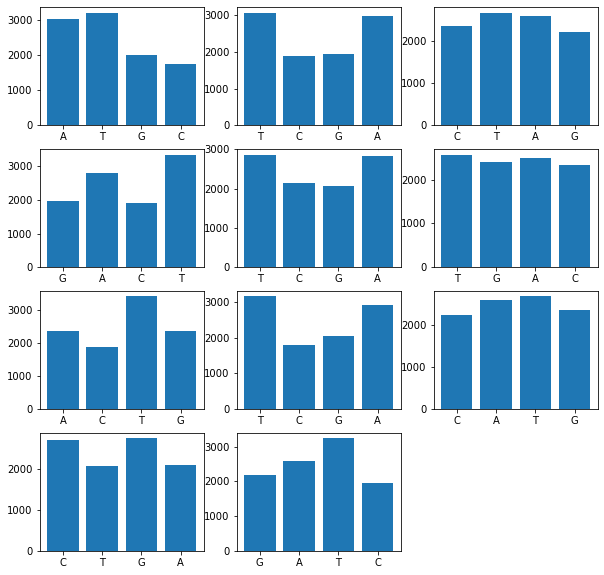

In [48]:
plt.figure(figsize = (10,10))

    

class_i=0
for i in counter_list:
    ax1 = plt.subplot(4,3,class_i+1)
    ax1.set_title('Subsequence length=%i, Non-Encoded'%Atomic_size[k])


    plt.bar(i.keys(), i.values())
    class_i+=1